In [2]:
import cv2
# from camera import Camera
import matplotlib.pyplot as plt
import numpy as np


In [1]:
l_threshold = 11
a_threshold = 61
b_threshold = 99

canny_threshold1 = 34
canny_threshold2 = 214

img_path = "C:/Users/lisas/Documents/EPFL/MA2/MICRO-452_mobile_robotics/project/test1.jpg"

In [3]:
def show_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.imshow(img)
    plt.show()

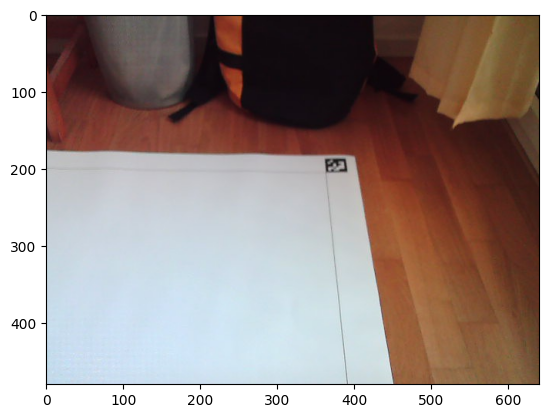

In [4]:
img = cv2.imread(img_path)
show_img(img)

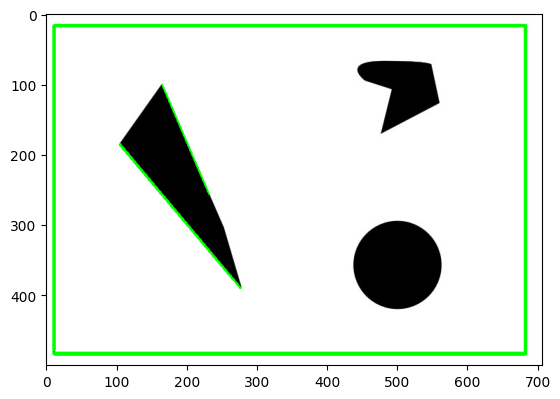

In [71]:
def hough_lines(image):
    # Load image, grayscale, Canny edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 80, 100, apertureSize=3)
    # Use HoughLinesP to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 90, minLineLength=90, maxLineGap=10)
    # Draw lines on the image
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # Display the image
    show_img(image)

img = cv2.imread(img_path)
hough_lines(img)

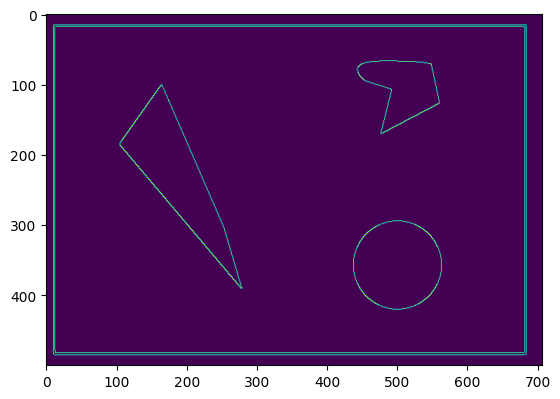

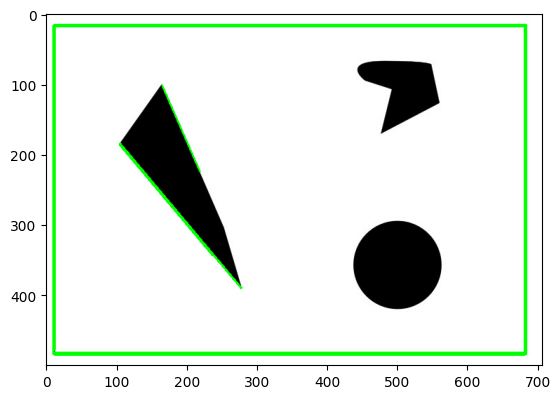

In [79]:
def detect_rectangles(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    # edges = cv2.GaussianBlur(gray, (3,3), 0)

    # Debug: Show the result of edge detection
    # cv2.imshow("Edges", edges)
    show_img(edges)

    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 80, minLineLength=90, maxLineGap=20)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # cv2.imshow("Rectangles Detected", image)
    show_img(image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


detect_rectangles(img_path)


In [84]:
img = cv2.imread(img_path)



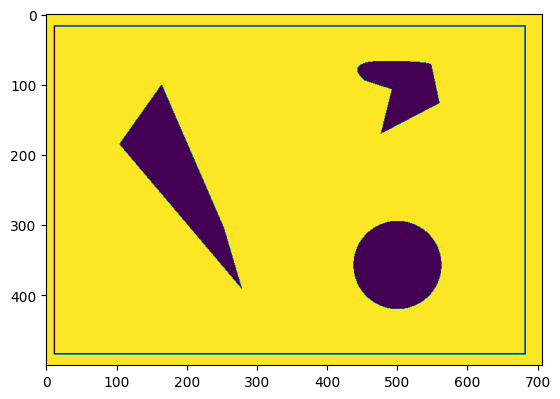

In [74]:
# x = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img = cv2.inRange(img, (l_threshold, a_threshold, b_threshold), (255, 255, 255))
show_img(img)
x = img.copy()

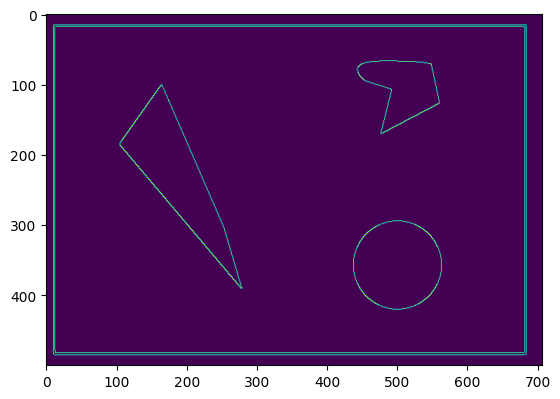

In [85]:
x = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), canny_threshold1, canny_threshold2)

show_img(x)

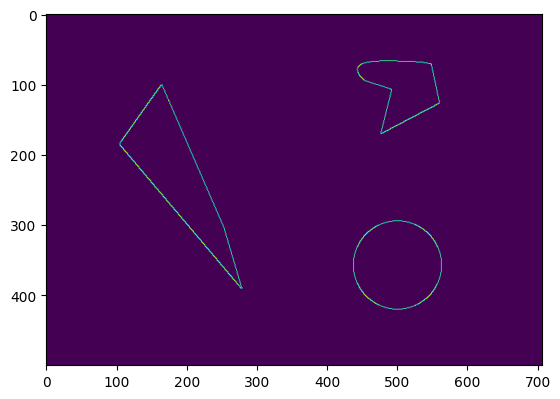

In [86]:
contours, _ = cv2.findContours(x, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(x, contours, -1, (0, 255, 255), 10)
show_img(x)

# transform of map

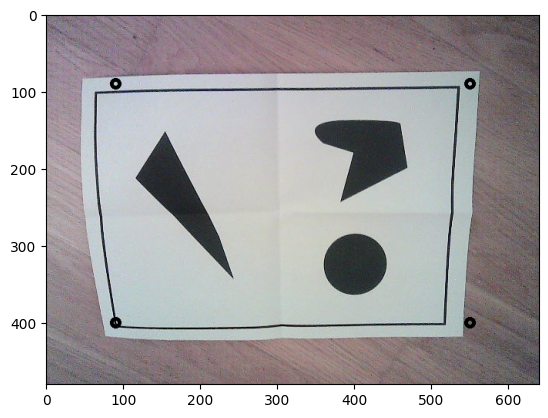

In [15]:
img = cv2.imread(img_path)

corners = [[90,90], [90,400], [550,400], [550,90]]

for c in corners:
    cv2.circle(img, c, 5, (0,0,0), 3)

show_img(img)

In [16]:
def draw_grid(img, grid_shape, corners, color=(0, 0, 0), thickness=1):
    h = abs(corners[0][1]-corners[1][1])
    w = abs(corners[0][0]-corners[3][0])
    startx, starty = corners[0][0], corners[0][1]
    rows, cols = grid_shape
    dy, dx = h / rows, w / cols

    # draw vertical lines
    for x in np.linspace(start=startx, stop=startx+w, num=cols+1):
        x = int(round(x))
        cv2.line(img, (x, starty), (x, starty+h), color=color, thickness=thickness)

    # draw horizontal lines
    for y in np.linspace(start=starty, stop=starty+h, num=rows+1):
        y = int(round(y))
        cv2.line(img, (startx, y), (startx+w, y), color=color, thickness=thickness)

    return img

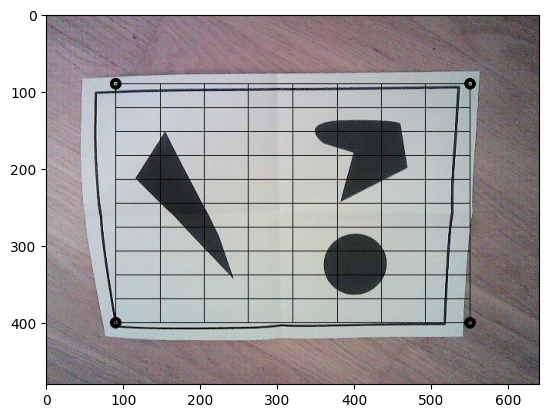

In [17]:
# add grid
img = draw_grid(img, (10,8), corners)
show_img(img)

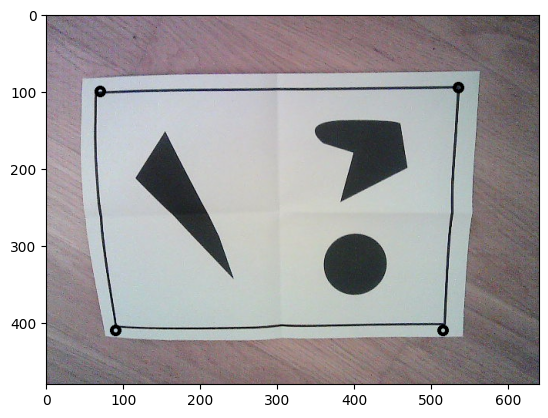

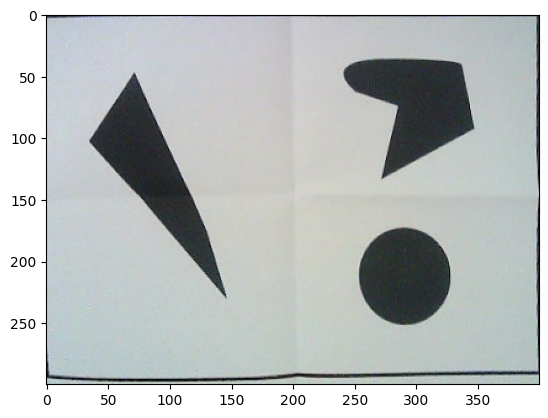

In [45]:
image = cv2.imread(img_path)
source_points = np.array([[70, 100], [535,95], [90,410], [515,410]], dtype="float32")

# Define the target rectangle dimensions (desired dimensions)
width, height = 400, 300
destination_points = np.array([
    [0, 0],
    [width - 1, 0],
    [0, height - 1],
    [width - 1, height - 1]
], dtype="float32")

# Compute the perspective transformation matrix
matrix = cv2.getPerspectiveTransform(source_points, destination_points)

# Perform the perspective warp
warped = cv2.warpPerspective(image, matrix, (width, height))

for c in source_points:
    cv2.circle(image, c.astype(int), 5, (0,0,0), 3)
# Show the original and corrected images
# cv2.imshow("Original", image)
show_img(image)
# cv2.imshow("Warped", warped)
show_img(warped)

In [87]:
type(warped)

numpy.ndarray

In [15]:
a = np.array([[1,1], [np.nan, np.nan], [2,2]])
np.nanmean(a)
np.ones((10,2))*np.nan
np.nan in [np.nanmean(np.array([np.nan])), 1, 0]

C:\Users\lisas\AppData\Local\Temp\ipykernel_33616\2588087934.py:4: RuntimeWarning: Mean of empty slice
  np.nan in [np.nanmean(np.array([np.nan])), 1, 0]


False

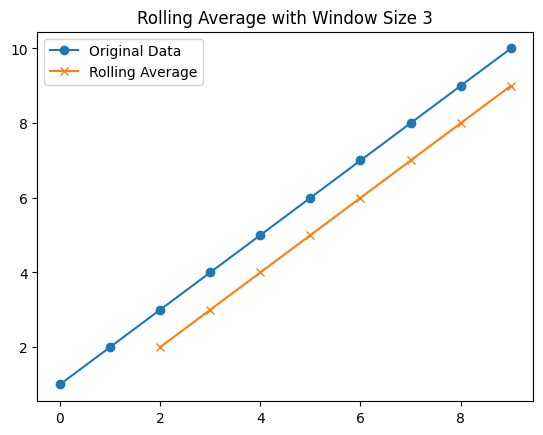

Original Data:  [ 1  2  3  4  5  6  7  8  9 10]
Rolling Average:  [2. 3. 4. 5. 6. 7. 8. 9.]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Define the window size for the rolling average
window_size = 3

# Create the kernel (filter), each element is 1/window_size
kernel = np.ones(window_size) / window_size

# Perform the convolution to calculate the rolling average
rolling_avg = np.convolve(data, kernel, mode='valid')

# Plot the results
plt.plot(data, label='Original Data', marker='o')
plt.plot(range(window_size-1, len(data)), rolling_avg, label='Rolling Average', marker='x')
plt.legend()
plt.title(f'Rolling Average with Window Size {window_size}')
plt.show()

# Print the result
print("Original Data: ", data)
print("Rolling Average: ", rolling_avg)


In [50]:
corners = (np.array([[[1,2], [1,1], [2,1], [2,2]]]),)

c1 = corners[0][0][0].astype(int)
c2 = corners[0][0][1].astype(int)
c3 = corners[0][0][2].astype(int)
center = np.mean([c1, c3], axis=0)
p = np.mean([c1, c2], axis=0)
angle = np.arctan2((center-p)[1], (p-center)[0])
angle/np.pi*180


np.float64(180.0)

In [2]:
import helpers
nested_dict = {
    "map_size": [100, 100],  # Example of map size as a tuple (width, height)
    "obstacles": {
        "blue": 50,
        "green": 30,
        "red": 70,
        "kernel_size": 5,
        "area": 1000
    },
    "goal": {
        "blue": 60,
        "green": 40,
        "red": 80,
        "kernel_size": 4,
        "area": 800
    }
}


parameters = helpers.Hyperparameters(nested_dict)
parameters.obstacles.area
helpers.dump_yaml(helpers.object_to_dict(parameters))

In [4]:
p = helpers.Hyperparameters(helpers.read_yaml())
p.obstacles.blue
p.map_size

[100, 100]

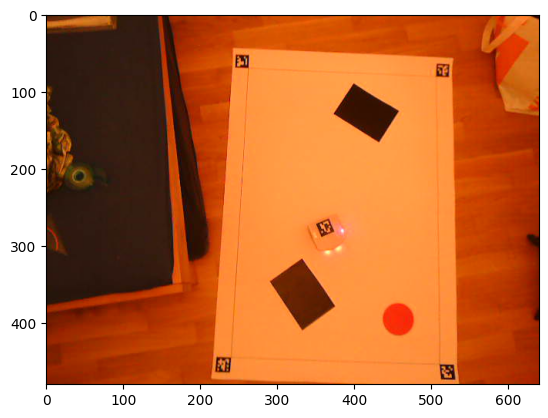

In [31]:
import cv2

cap = cv2.VideoCapture(2)

img = cap.read()
show_img(img[1])

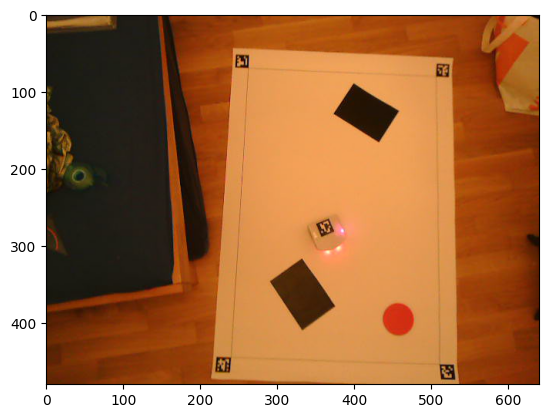

In [32]:
img = cap.read()[1]
show_img(img)

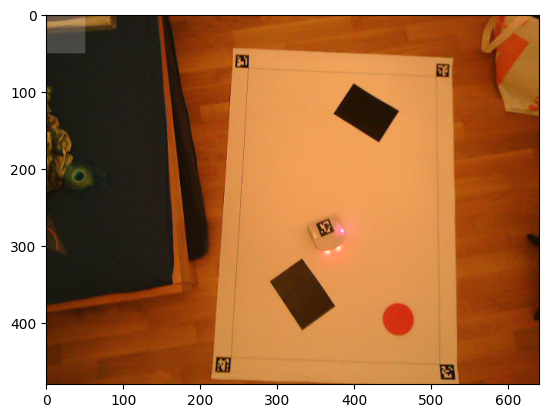

In [33]:
cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)

rectangle_contours = np.array([[[1,1], [1,50], [50,50], [50,1]]])

# define a image with same size as img a rectangle in white and black background
img_size = img.shape[:2]
overlay = img.copy()
# rectangle = np.zeros((img_size[0], img_size[1], 3), np.uint8)
cv2.drawContours(overlay, rectangle_contours, -1, (255, 255, 255), -1)
# cv2.rectangle(overlay, (25, 25), (275, 275), (255, 255, 255), -1)

# combine the two images where rectangle is white and combine with 0.2* rectangle and 0.8*img
combined = cv2.addWeighted(overlay, 0.2, img, 0.8, 0)

show_img(combined)

In [34]:
cap.release()